In [1]:
%run ../src/__init__.py


In [2]:
%run ../src/load_data.py


/home/jovyan/dsi/Capstone/load_data.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['attendance'][x] = data.iloc[x + 1]['attendance']
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/gener

### Los Angeles Angels, formely known as Anaheim and California Angels

In [3]:
angels_df =final_drop[(final_drop['team'] == 'ANA') | (final_drop['team'] == 'LAA')|(final_drop['team']=='CAL')].sort_values('date',axis=0)

In [4]:
angels_df = team_data_clean(angels_df)

/home/jovyan/dsi/Capstone/__init__.py:29: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [5]:
angels_df = add_rival('LAA', angels_df)

In [6]:
new_data=pd.read_pickle('data/test_data_mlb.pkl')

In [7]:
angels_new = new_data[(new_data['team'] == 'ANA') | (new_data['team'] == 'LAA')|(new_data['team']=='CAL')].sort_values('date',axis=0)

In [8]:
angels_new = test_data_clean(angels_new)

/home/jovyan/dsi/Capstone/__init__.py:56: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [9]:
angels_new = add_rival('LAA', angels_new)

In [10]:
angels_data = pd.concat([angels_df, angels_new],axis=0)

In [91]:
angels_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2243 entries, 8649 to 1052
Data columns (total 70 columns):
attendance         2243 non-null int64
date               2243 non-null datetime64[ns]
div_rank           2243 non-null int64
double_header      2243 non-null float64
gb                 2243 non-null float64
opening_day        2243 non-null float64
opponent           2243 non-null object
record             2243 non-null float64
runs_allowed_ma    2243 non-null float64
runs_ma            2243 non-null float64
runs_pg            2243 non-null float64
streak             2243 non-null int64
team               2243 non-null object
1990               2243 non-null int64
1991               2243 non-null int64
1992               2243 non-null int64
1993               2243 non-null int64
1994               2243 non-null int64
1995               2243 non-null int64
1996               2243 non-null int64
1997               2243 non-null int64
1998               2243 non-null int64
1999   

,count,mean,std,min,25%,50%,75%,max,skew
runs,2243.0,4.548373,3.055793,0.0,2.000000,4.000000,6.000000,21.0,0.888657
runs_allowed,2243.0,4.455194,3.150850,0.0,2.000000,4.000000,6.000000,21.0,0.931190
innings,2243.0,9.186358,0.814702,0.0,9.000000,9.000000,9.000000,19.0,3.260094
record,2243.0,0.508644,0.099864,0.0,0.465116,0.510345,0.564103,1.0,-1.342064
div_rank,2243.0,2.604547,1.345066,0.0,2.000000,2.000000,3.000000,7.0,0.738421
gb,2243.0,-5.192376,7.943454,-41.0,-9.000000,-3.500000,-0.500000,22.0,-0.662580
time,2243.0,177.406598,28.488391,0.0,159.000000,175.000000,191.500000,392.0,1.008692
attendance,2243.0,33442.615693,9308.499033,11478.0,25354.500000,36193.000000,41150.500000,61292.0,-0.513000
runs_pg,2243.0,4.577109,0.771872,0.0,4.225648,4.608696,5.000000,9.0,-1.874228
runs_ma,2243.0,4.554265,1.439776,0.8,3.600000,4.400000,5.400000,10.2,0.432158


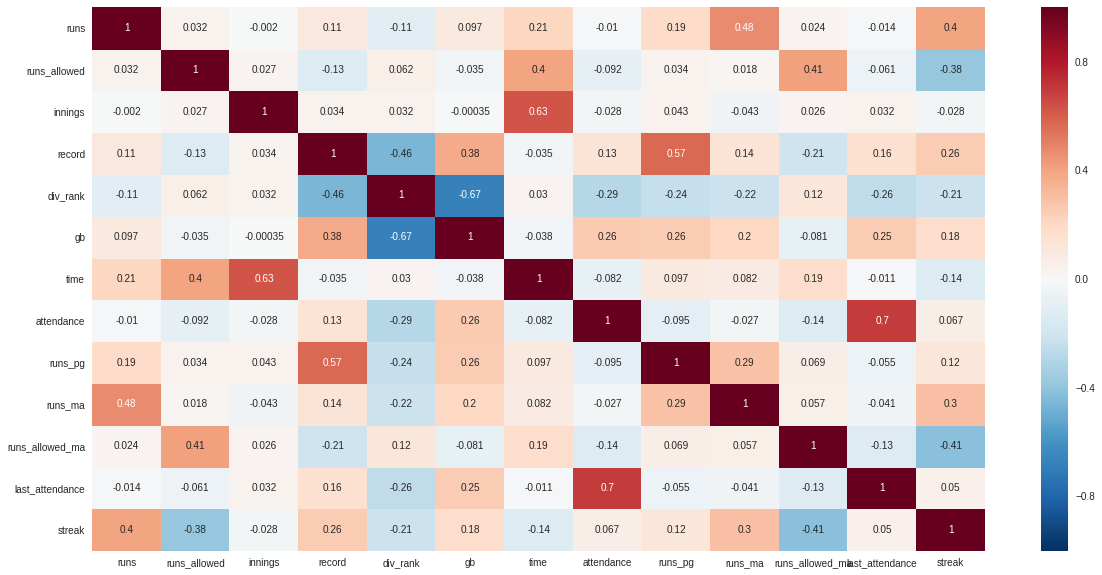

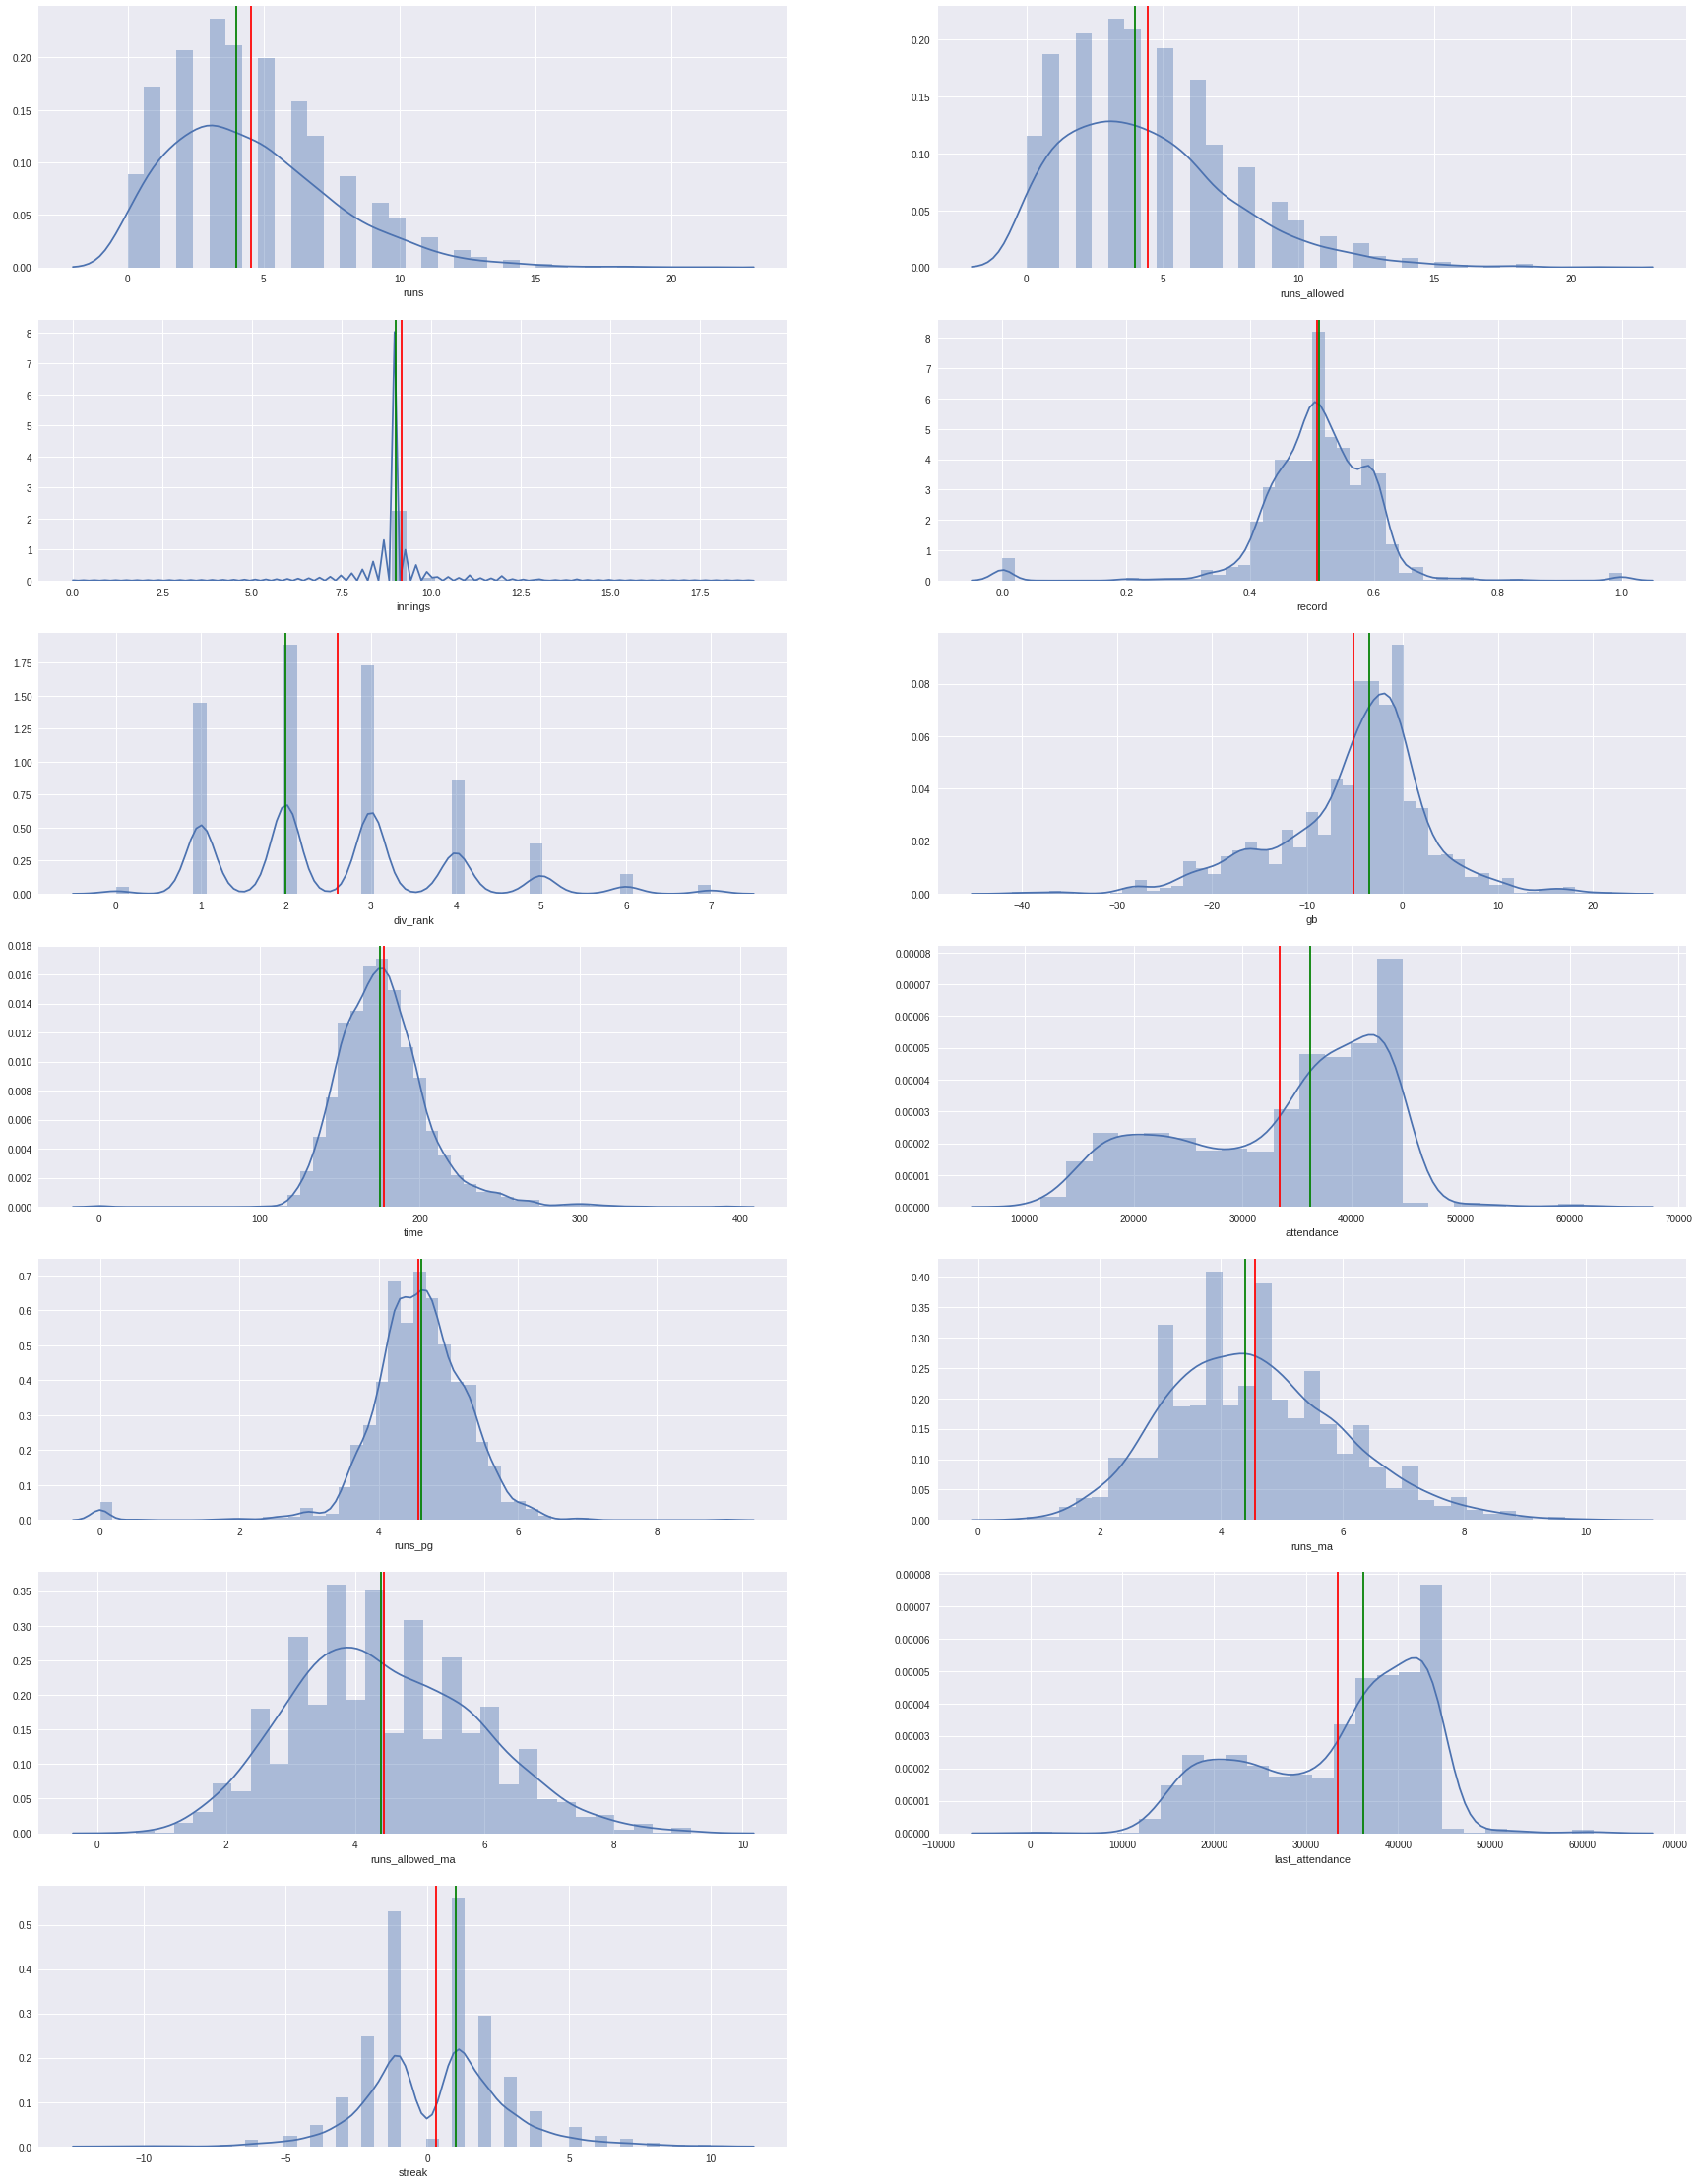

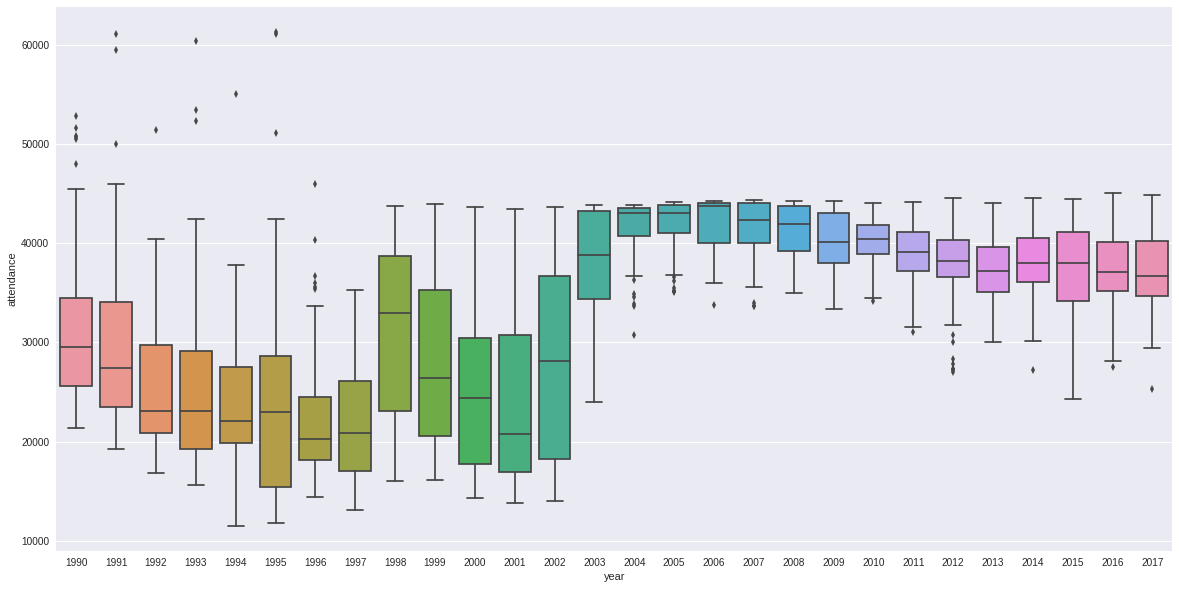

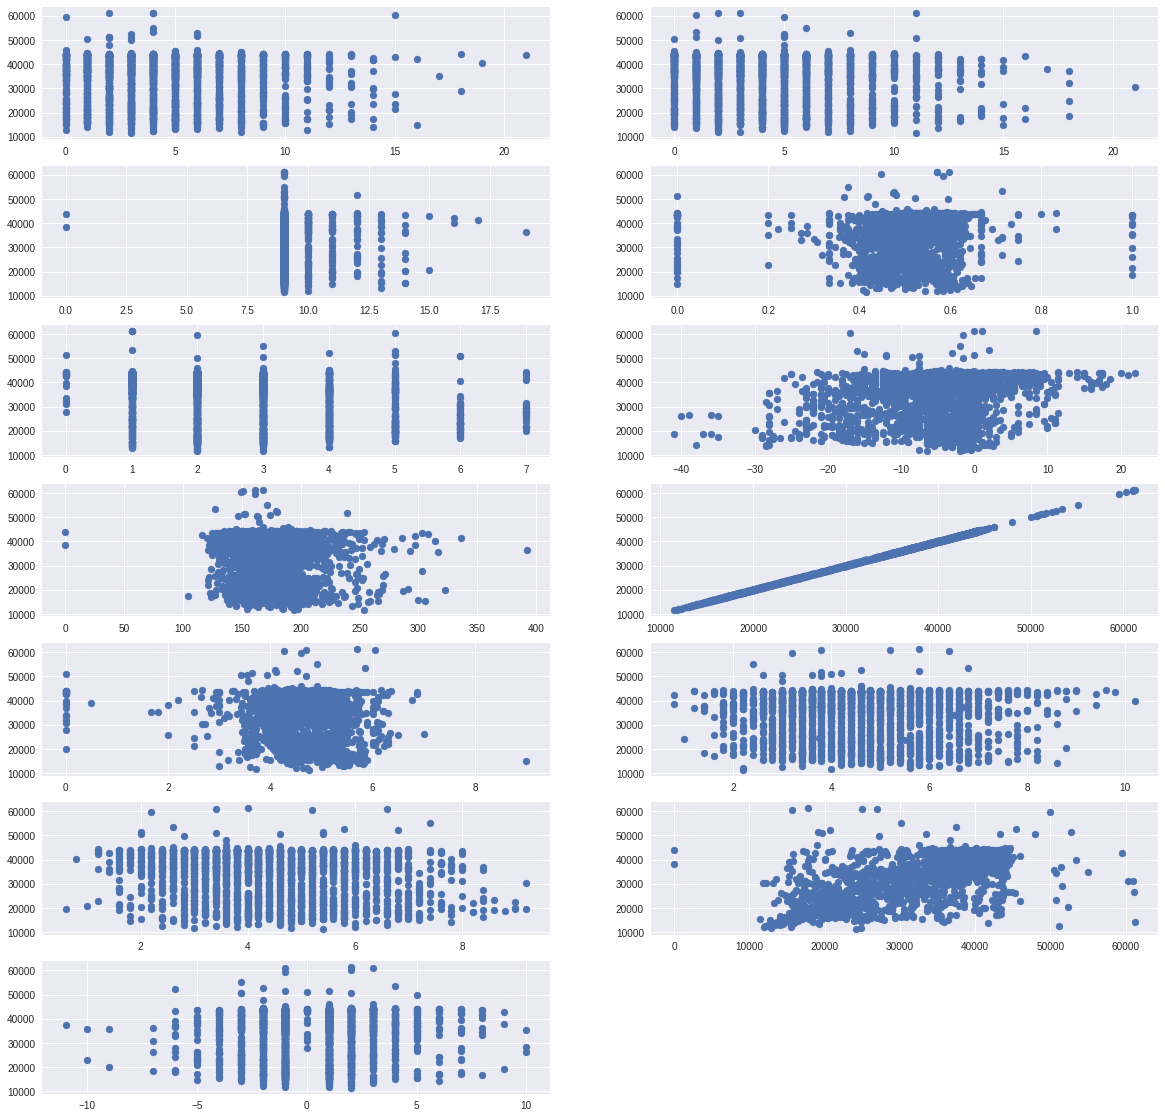

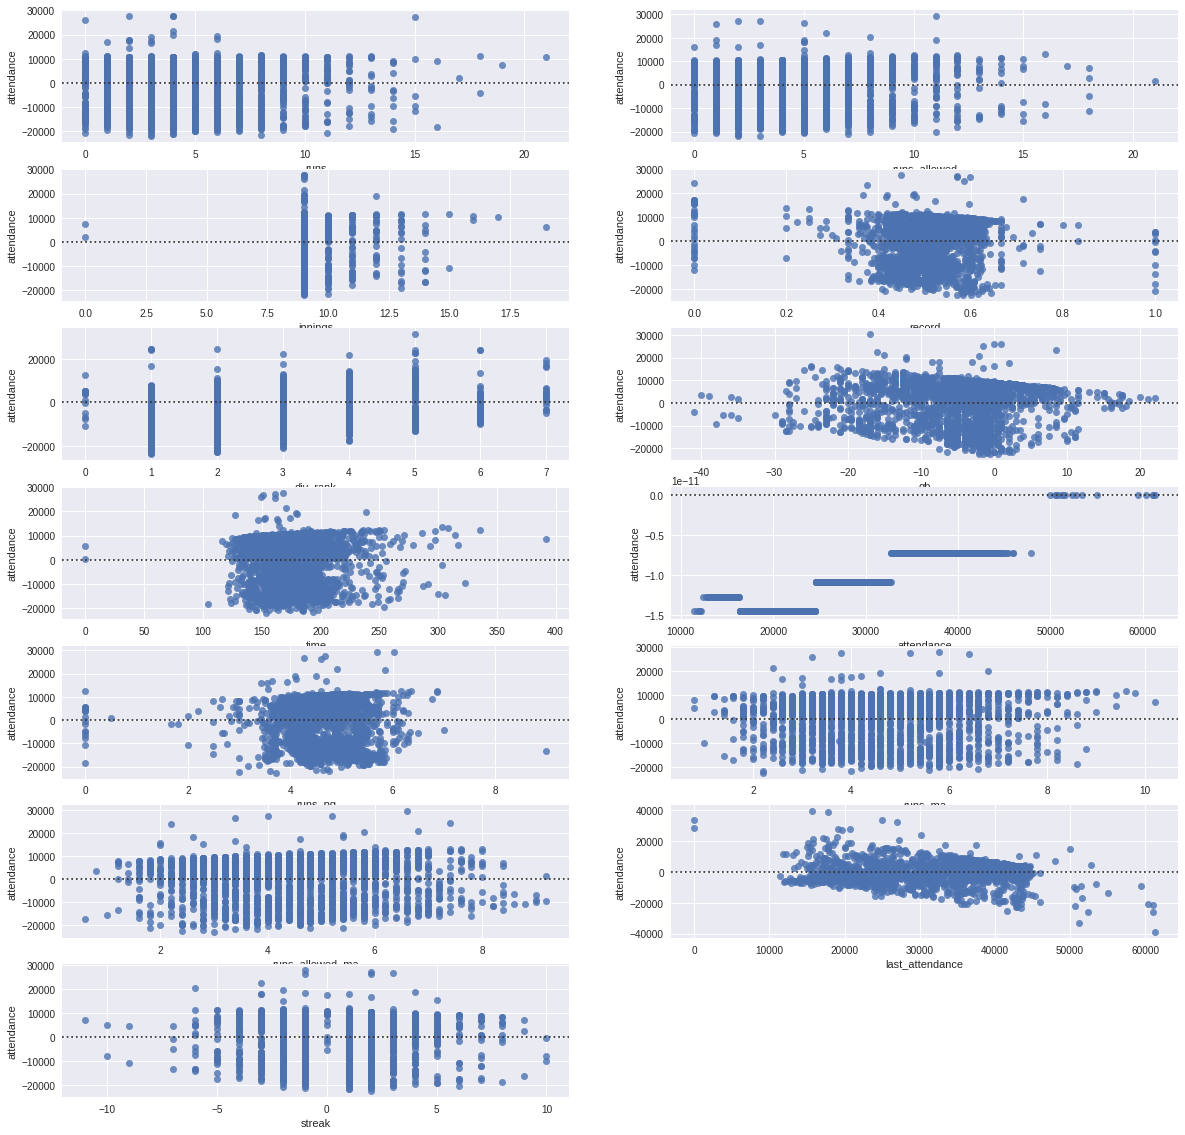

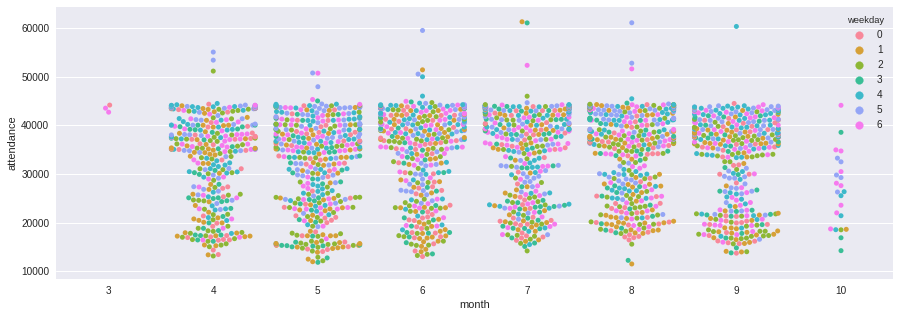

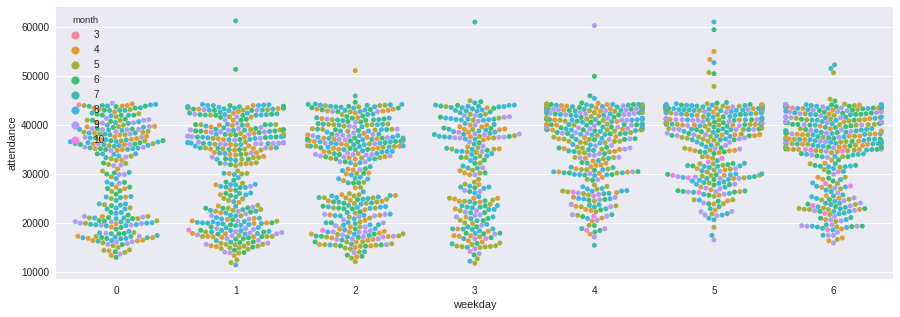

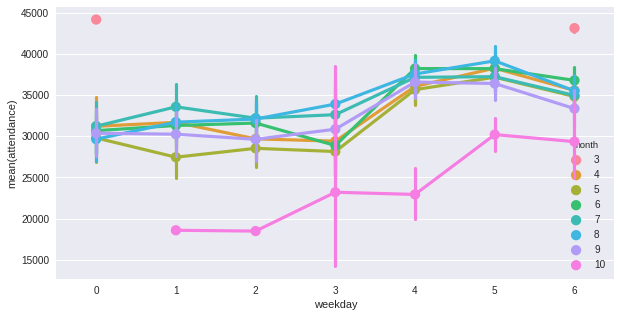

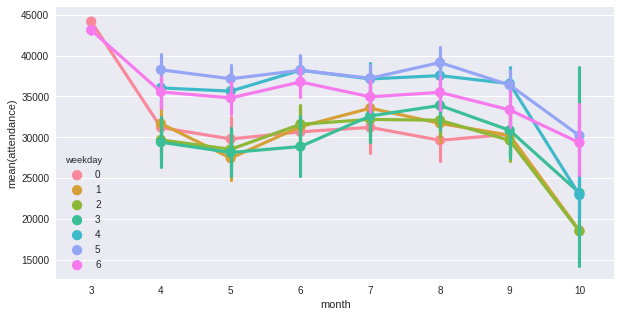

In [90]:
eda(angels_data)

In [99]:
annual_mean_r2(angels_data)

0.55095722417884274

In [11]:
angels_data, feature, target = model_fit_ready(angels_data)

In [12]:
bt = model_fit_score(feature, target)
bt

,train_score,test_score
Bagging_r2,0.937895,0.616412
Decision_tree_r2,1.000000,0.337889
Random_forest_r2,0.928208,0.619390
Gradient_boost_r2,0.773009,0.677449


In [13]:
co_f = feature.copy()
scale = StandardScaler()
feature_sca = pd.DataFrame(scale.fit_transform(co_f),columns=co_f.columns)

In [15]:
s_n = model_fit_score(feature_sca, target)

In [18]:
score_table = pd.concat([bt, s_n],axis=1)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'))))
Feature top 10 ranking:
1. last_attendance (0.895780)
2. F (0.086331)
3. 1995 (0.017889)
4. 2002 (0.000000)
5. 1997 (0.000000)
6. 1998 (0.000000)
7. 1999 (0.000000)
8. 2000 (0.000000)
9. 2001 (0.000000)
10. rival (0.000000)


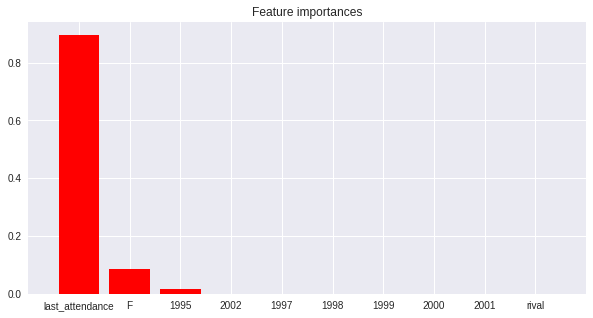

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=19, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.787816)
2. F (0.072144)
3. gb (0.019209)
4. record (0.014309)
5. runs_pg (0.014299)
6. M (0.012836)
7. time (0.011481)
8. runs_ma (0.008988)
9. runs_allowed_ma (0.008446)
10. div_rank (0.008047)


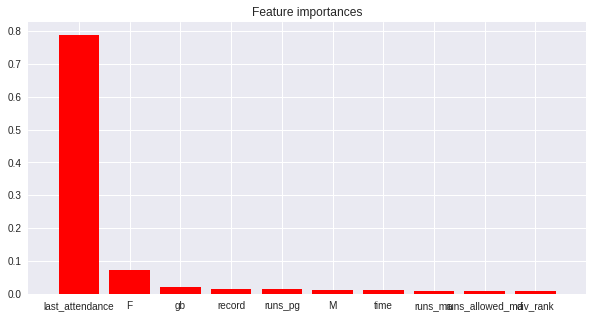

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='log2', max_leaf_nodes=None,
             min_impurity...s=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.173981)
2. runs_pg (0.064062)
3. F (0.054072)
4. gb (0.052181)
5. time (0.040431)
6. record (0.036114)
7. runs_ma (0.026814)
8. runs_allowed_ma (0.026599)
9. 1996 (0.026365)
10. 1995 (0.025992)


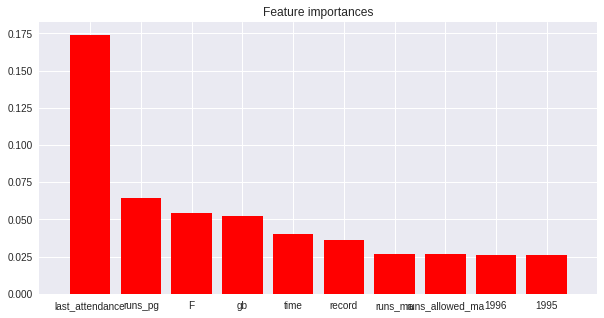

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.5,
         n_estimators=27, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False))))
Feature top 10 ranking:
1. div_rank (0.588822)
2. double_header (0.048377)
3. gb (0.030554)
4. opening_day (0.028789)
5. record (0.025902)
6. runs_allowed_ma (0.023935)
7. runs_ma (0.021112)
8. runs_pg (0.016323)
9. streak (0.015368)
10. 1990 (0.015353)


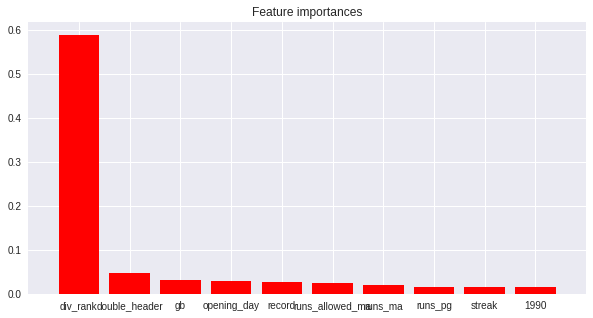

,train_score,test_score,train_score,test_score,P&O_train_score,P&O_test_score
Bagging_r2,0.937895,0.616412,0.930294,0.609869,0.853386,0.655022
Decision_tree_r2,1.000000,0.337889,1.000000,0.363055,0.563366,0.523544
Random_forest_r2,0.928208,0.619390,0.926781,0.615590,0.691323,0.622664
Gradient_boost_r2,0.773009,0.677449,0.773009,0.677408,0.783414,0.705328


In [19]:
grid_score(feature, target, score_table)

In [20]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(feature.values, i) for i in range(feature_sca.shape[1])]
vif["features"] = feature_sca.columns

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [21]:
vif.sort_values('VIF Factor',axis=0,ascending=False)[-16:-1]

,VIF Factor,features
0,4.478039,div_rank
2,4.475048,gb
7,3.350572,runs_pg
54,3.008617,last_attendance
4,2.941025,record
58,2.898195,time
8,2.555280,streak
56,2.430823,runs_allowed
55,2.381380,runs
57,2.301143,innings


In [22]:
vlf_feature = feature_sca.drop(['div_rank','gb'],axis=1)

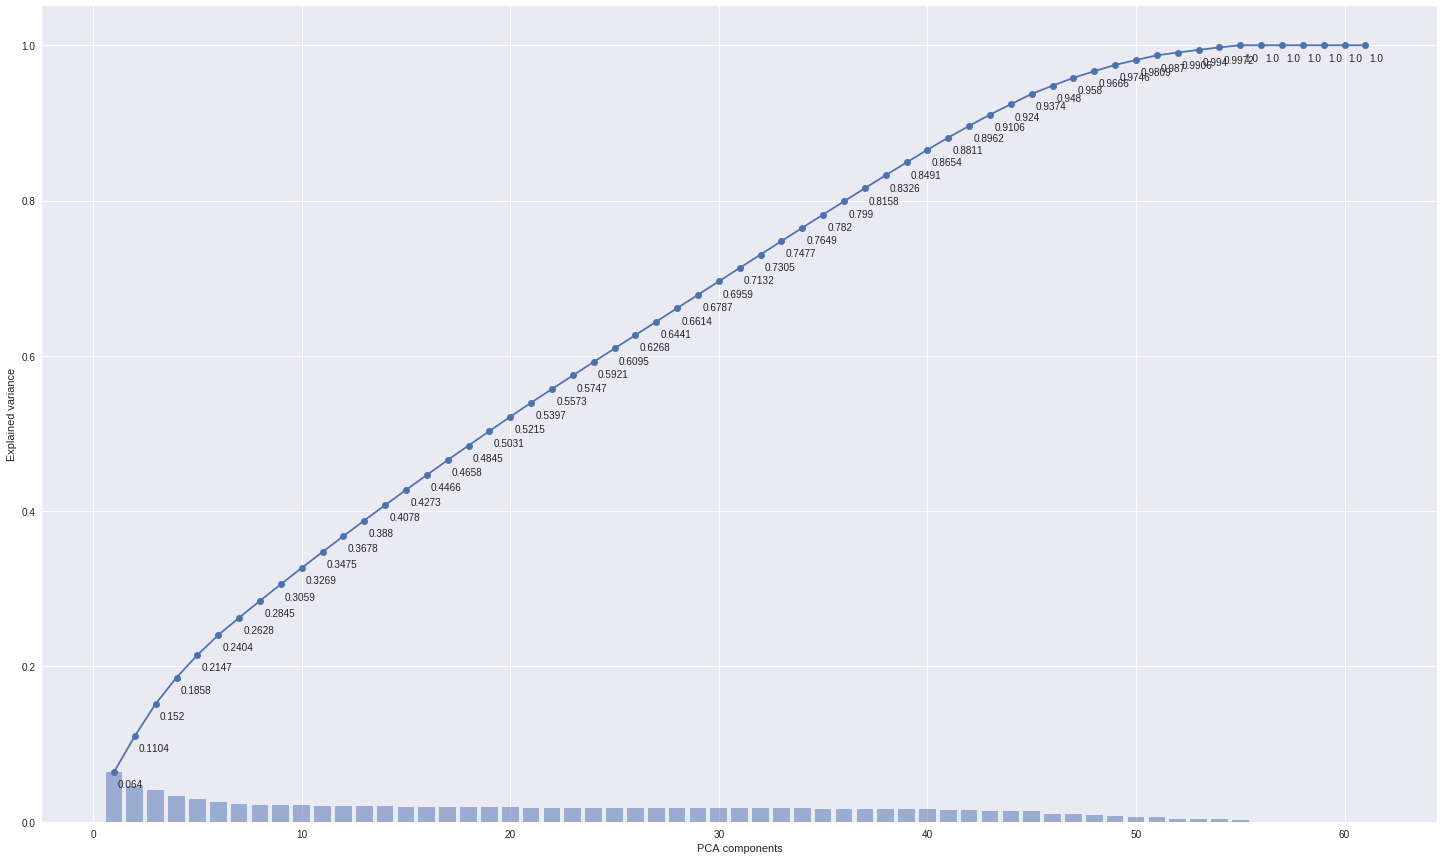

In [23]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(vlf_feature))


plt.figure(figsize=(25,15))

X = np.arange(1,62)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [24]:
non_para_model_fit(vlf_feature, target, 50)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.998885,0.000000
Support Vector Machine,0.704795,0.728279


In [25]:
inter_data, anova_feature, drop_list = interaction_feature(feature, target)

/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [26]:
drop_list

,f_score,p_value
double_header,1.814046,0.178160
runs_ma,1.576813,0.209351
1990,3.338801,0.067797
march,3.481439,0.062191
april,0.182489,0.669284
june,2.731764,0.098511
sep,1.944116,0.163360
runs,0.240398,0.623967
innings,1.755678,0.185300
rival,2.317366,0.128078


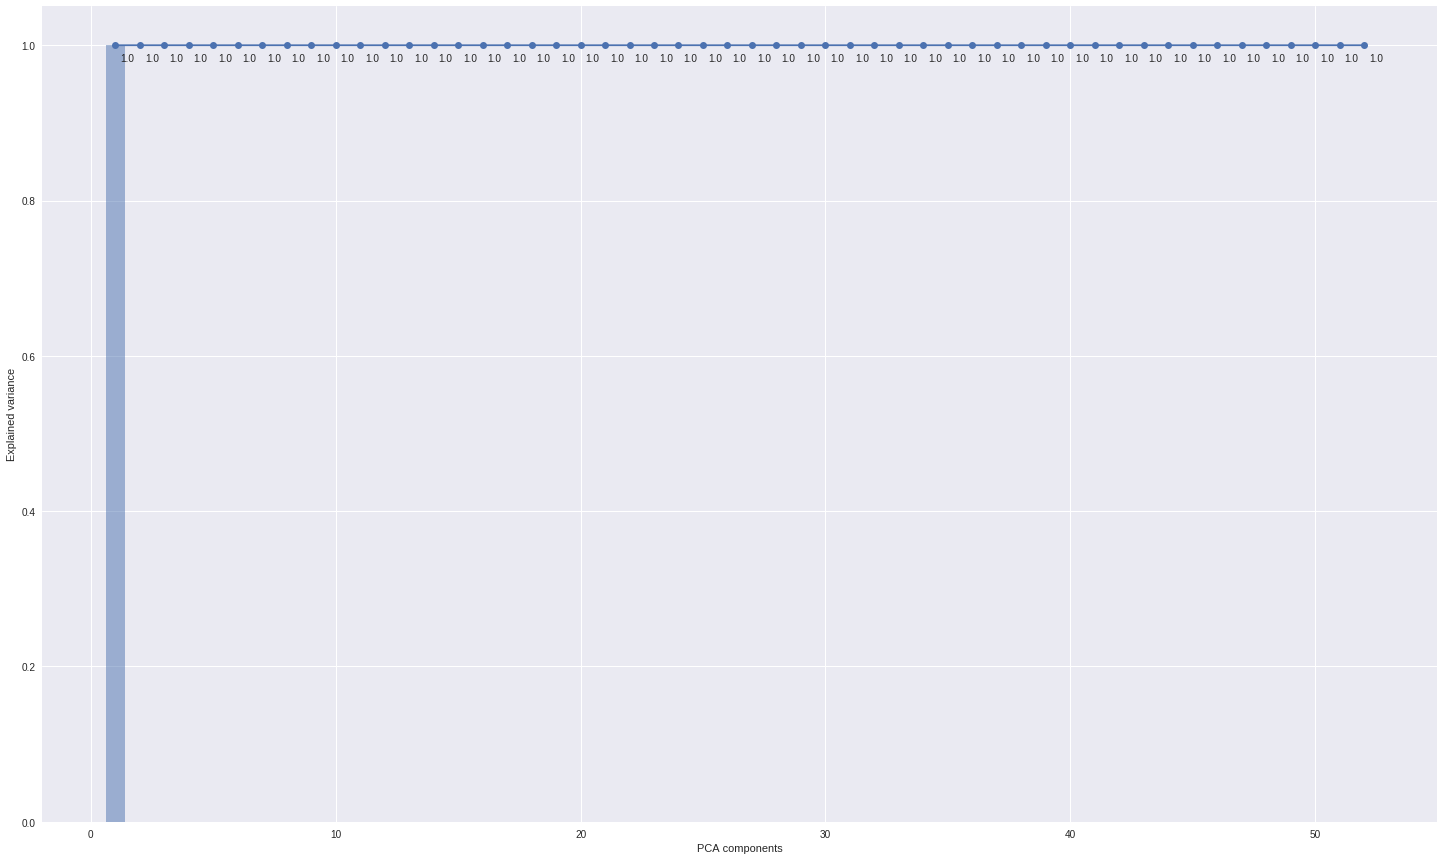

In [28]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(anova_feature))

plt.figure(figsize=(25,15))

X = np.arange(1,53)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [29]:
non_para_model_fit(anova_feature, target, 1)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.006132,0.000000
Support Vector Machine,0.703318,0.739633
